<a href="https://colab.research.google.com/github/coa-project/coabook/blob/master/Advertising_pycoa_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://nbviewer.jupyter.org/github/coa-project/coabook/blob/master/using_pycoa_in_depth.ipynb" target="_parent" ><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" height="25"  alt="View in Jupyter nbviewwer" align="middle" /></a>

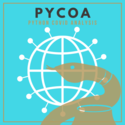

# Producing output plots for pycoa v2.0 advertising
[ⓒpycoa.fr](http://pycoa.fr)

This notebook is designed for the `v2.0` version of pycoa.

In [2]:
!pip install git+https://github.com/coa-project/pycoa.git@v2.0

  Cloning https://github.com/coa-project/pycoa.git (to revision v2.0) to /tmp/pip-req-build-3r1_lvo9
  Running command git clone -q https://github.com/coa-project/pycoa.git /tmp/pip-req-build-3r1_lvo9
  Running command git checkout -q 280a1195669ce1a6f397d9d0f2ac31215487f3ed
     |████████████████████████████████| 163kB 5.6MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 102kB 6.8MB/s 
     |████████████████████████████████| 972kB 14.7MB/s 
     |████████████████████████████████| 10.1MB 24.0MB/s 
     |████████████████████████████████| 245kB 42.4MB/s 
     |████████████████████████████████| 14.8MB 303kB/s 
     |████████████████████████████████| 6.5MB 46.1MB/s 
     |████████████████████████████████| 245kB 41.3MB/s 
  Created wheel for PyCoA: filename=PyCoA-2.0-cp36-none-any.whl size=53622 sha256=09fe952cadcfc134384f97ae99ae4fbb6b41f8b371bfd88f7d41e57c0f2ba989
  Stored in directory: /tmp/pip-ephem-wheel-cache-8m_z89oz/wheels/1d/5a/50/0

In [3]:
import sys
# sys.path.insert(1, '../pycoa')   # adapt the path for local install, if necessary. Under google colab, do not change anything

import importlib
coa_module_info = importlib.util.find_spec("coa")
if coa_module_info == None:
  raise ModuleNotFoundError("The coa module is not found. Please check your install")

import coa
print(coa.__version__, coa.__author__ , coa.__email__ ) # print some informations
if coa.__version__ != 'v2.0':
  raise ImportError("The pycoa package version is incorrect. Expecting dev.")

v2.0 Tristan Beau, Julien Browaeys, Olivier Dadoun support@pycoa.fr


In [4]:
import coa.front as cf

JHU aka Johns Hopkins database selected ...
Few information concernant the selected database :  jhu
Available which key-words for:  ['deaths', 'confirmed', 'recovered']
Example of location :  Bahamas, Panama, Sierra Leone, Algeria, Eswatini  ...
Last date data  2021-02-13


In [5]:
from bokeh.io import save,output_file

In [18]:
cf.setwhom('jhu') # default db
a=cf.get(option='sumall',output='pandas') # default is for all countries
output_file("pycoa_v2_plot_sumall.html")
save(cf._cocoplot.pycoa_date_plot(a,option='sumall'))

b=cf.get(where=['european union','gbr'],output='pandas')
output_file("pycoa_v2_plot_std.html")
save(cf._cocoplot.pycoa_date_plot(b,where=['european union','gbr']))

c=cf.get(where='americas',what='daily',when='01/02/2021',which='confirmed',output='pandas')
output_file("pycoa_v2_map.html")
save(cf._cocoplot.bokeh_map(c,None,where='americas',what='daily',when='01/02/2021',which='confirmed'))

cf.setwhom('owid') # changing database
d=cf.get(which='total_vaccinations',output='pandas') # default is for all countries
output_file("pycoa_v2_hist.html")
save(cf._cocoplot.pycoa_horizonhisto(d,None,which='total_vaccinations'))

cf.setwhom('jhu-usa')
f=cf.get(output='pandas')
output_file("pycoa_v2_jhu-usa.html")
save(cf._cocoplot.bokeh_map(f,None))

cf.setwhom('spf')
e=cf.get(which='tot_vacc',tile='esri',output='pandas')
output_file("pycoa_v2_spf.html")
save(cf._cocoplot.bokeh_map(e,None,which='tot_vacc',tile='esri'))

JHU aka Johns Hopkins database selected ...
Few information concernant the selected database :  jhu
Available which key-words for:  ['deaths', 'confirmed', 'recovered']
Example of location :  Bahamas, Senegal, Liberia, Namibia, Mauritania  ...
Last date data  2021-02-13
OWID aka "Our World in Data" database selected ...
Few information concernant the selected database :  owid
Available which key-words for:  ['total_deaths', 'total_cases', 'total_tests', 'total_vaccinations', 'total_cases_per_million', 'total_deaths_per_million', 'total_vaccinations_per_hundred', 'cur_reproduction_rate', 'cur_icu_patients', 'cur_hosp_patients', 'cur_idx_positive_rate']
Example of location :  Pakistan, Afghanistan, Croatia, Sao Tome and Principe, Georgia  ...
Last date data  2021-02-13


/usr/local/lib/python3.6/dist-packages/coa/display.py:129: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  self.data = gpd.GeoDataFrame(geopan,crs="EPSG:4326")


USA, JHU aka Johns Hopkins database selected ...
Few information concernant the selected database :  jhu-usa
Available which key-words for:  ['deaths', 'confirmed']
Example of location :  OR, HI, RI, NY, ND  ...
Last date data  2021-02-13
SPF aka Sante Publique France database selected ...
... Five differents db from SPF will be parsed ...


CoaDbError: ignored